In [28]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression as lr
from sklearn.model_selection import train_test_split 
import seaborn as sns
import random 

In [29]:
housing_data = pd.read_csv("boston_house_prices.csv")
df = pd.DataFrame(data = housing_data)
df = df.drop(columns = "PTRATIO") # we alised a column we arent using in the table 
df = df.dropna() # we dropped any columns that have NaN values because models cannot run with NaN values
# df.fillna(1, inplace = True) #replaces NaN values with 1 and inplace does not
# make another dataframe, it changes the original one
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,393.45,6.48,22.0


Mean Squared Error: 79.9837421262143


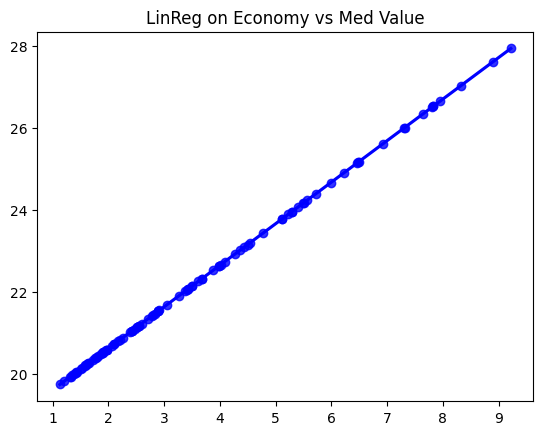

In [39]:
from sklearn.metrics import mean_squared_error #error 

X = df["DIS"]
X = np.array(X).reshape(-1, 1) # only done if there is only one X sample, must turn into array to reshape
y = df["MEDV"] # independent- what you want your model to predict 
y = np.array(y).reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) # test_size means 80% train, 20% test
# model trains on X_train and y_train and predicts what y_test is based on X_test values
model = lr() # calling linear regression function
model.fit(X_train, y_train) # model trains 
pred = model.predict(X_test) # model predicts y values for x values 

sns.regplot(x=X_test, y=pred, fit_reg = True, color="blue") # generates plot for regression 
print("Mean Squared Error: " + str(mean_squared_error(y_test, pred))) # error (0 is perfect)
plt.title("LinReg on Economy vs Med Value") # title 
plt.show() # shows graph 